## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Problem

> Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 
The goal of this analysis is to explore what types of films are currently doing the best at the box office, and to provide actionable recommendations to Microsoft on what type of files to create.


# OBTAIN

- There are 11 different csv files provided in the zippedData folder. 
- Using these files is optional. 




In [1]:
# Your code here - remember to use markdown cells for comments as well!
import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

folder = "zippedData/"
os.listdir(folder)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [2]:
f"{folder}*.csv*"

'zippedData/*.csv*'

In [3]:
## Preview Files
files = glob.glob(f"{folder}*.csv*")
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
## variable friendly filenames
files[0].replace('.csv.gz','').split('/')[-1].replace('.','_')

'imdb_title_crew'

In [5]:
## Load all files into a dict using their filename as key
tables = {}
dashes='---'*25

for file in files:
    ## Save a variable-friendly version of the file name
    table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
    print(dashes)
    
    ## Load and preview dataframe
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()
    

---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [6]:
df1 = tables['tmdb_movies']
df1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
ex = df1.loc[0,'genre_ids']
ex.replace('[','').replace(']','').split(', ')

['12', '14', '10751']

In [9]:
import json
df1['genre_id_list'] = df1['genre_ids'].map(json.loads)
df1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_list
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[12, 14, 10751]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"[27, 18]"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"[18, 53]"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"[14, 28, 12]"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"[10751, 12, 28]"


In [10]:
df1.isna()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_list
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False,False,False


In [11]:
genre_df = df1.explode('genre_id_list')
genre_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_list
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,14
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,10751
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,12
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,10751
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,12
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,28
26516,26516,"[53, 27]",309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,53


In [55]:
palette_muted = sns.color_palette('muted')
palette_muted

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [13]:
# df1['genre_id_list'] = df1['genre_ids'].map(lambda ex: ex.replace('[','').replace(']','').split(', ') )
df1.loc[0,'genre_id_list']

[12, 14, 10751]

In [14]:
df2 = tables['imdb_title_basics']
df2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [15]:
df2.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [16]:
df2[df2['genres'].isna()].sort_values('start_year').head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
18738,tt1819635,Ocaso,Ocaso,2010,80.0,NaN
123475,tt7493048,Zoi podilato,Zoi podilato,2010,NaN,NaN
31823,tt2200832,Beyond Belief,Beyond Belief,2010,80.0,NaN
110268,tt6448910,Febiofest 2010,Febiofest 2010,2010,NaN,NaN
10616,tt1604602,Running on Empty,Ranningu on enputi,2010,80.0,NaN
110263,tt6448882,Hu Wang Gui Lai,Hu Wang Gui Lai,2010,NaN,NaN
32354,tt2217494,Art of the Japanese Sword,Art of the Japanese Sword,2010,83.0,NaN
10681,tt1606611,Hitoya ni saku hana,Hitoya ni saku hana,2010,NaN,NaN
110255,tt6448850,Indie-AniFest 2010,Indie-AniFest 2010,2010,NaN,NaN
11065,tt1619045,The HIV Story Project,The HIV Story Project,2010,NaN,NaN


In [17]:
df2.dropna(subset=['genres'],inplace=True)

In [18]:
df2['genre_list'] = df2['genres'].map(lambda x: x.split(','))
df2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War","[Adventure, History, War]"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,[Drama]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,[Comedy]


(60.0, 120.0)

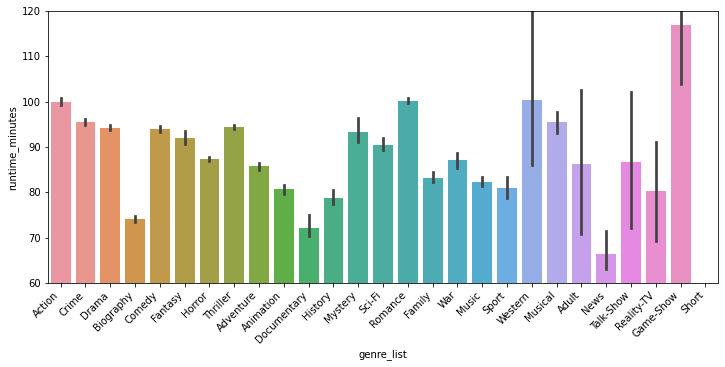

In [19]:
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=df2.explode('genre_list'),x='genre_list',y='runtime_minutes',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');
ax.set_ylim(60,120)

In [20]:
import matplotlib as mpl

In [21]:
locator = mpl.ticker.FixedLocator(np.arange(65,125,10))
locator

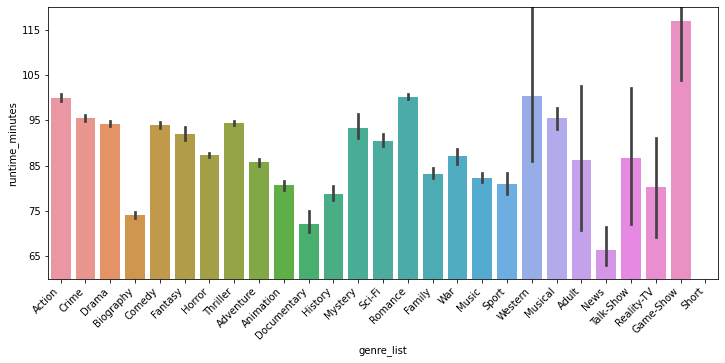

In [22]:
ax.yaxis.set_major_locator(locator)
fig

## Approaches to consider:

- Using the provided csv's and merging dataframes with:
    - regular pandas
    - pandasql
- Using the provided csv's and creating a your own SQL database(using sqlite3)
- Sourcing your own dataset using Web Scraping.
- Sourcing your own dataset using an API

- Using 1 of the provided csv's and supplemnting it with additional data from an API

### If you feel that you are behind on material

>- Then limit yourself to using just the following 3 provided tables:
    - imdb.title.basics
    - imdb.title.ratings
    - bom.movie_gross

## Using the Provided Data - Join with Pandas

>#### Questions to consider:
>1. Where is the financial data?
>2. What columns are primary keys/unique indices?
>3. What tables could I join on what columns?

# 03/17/21 Office Hours

In [57]:
palette_muted = sns.color_palette('muted')
palette_muted

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [58]:
palette_dark = sns.color_palette('dark')
palette_dark

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

<AxesSubplot:xlabel='genre_id_list', ylabel='popularity'>

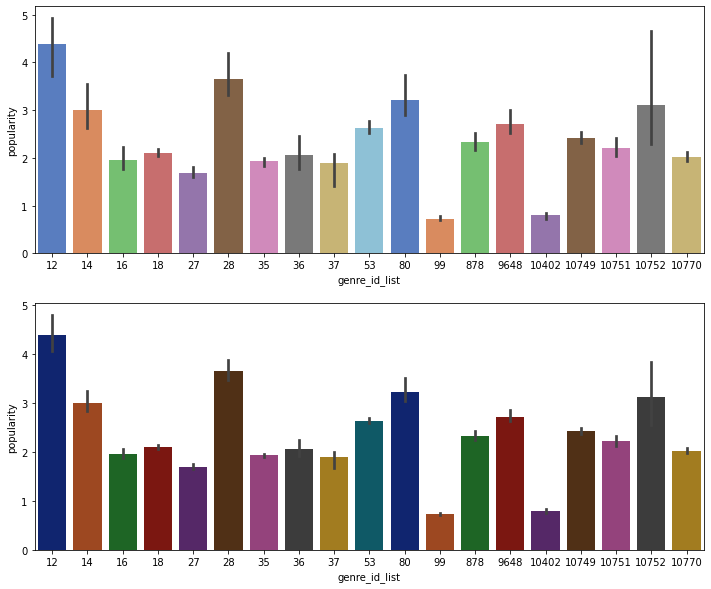

In [62]:
fig,axes = plt.subplots(figsize=(12,10),nrows=2)
sns.barplot(data=genre_df, x = 'genre_id_list',y='popularity',ax=axes[0],
           estimator= np.median,palette=palette_muted)#,ci=68)
sns.barplot(data=genre_df, x = 'genre_id_list',y='popularity',ax=axes[1],
           estimator= np.median,ci=68,palette=palette_dark)

In [83]:
fig.savefig('demo-figure-matplotlib.png',transparent=False,facecolor='white')

## Questions

1. Looping through "genre1",'genre2','genre3'

## Question 1

In [31]:
# def get_genres_123(genres):
#     genre_list = genres.
# tables['imdb_title_basics']
pd.set_option('display.max_columns',0)

In [32]:
df = pd.read_csv('berke_dataset.csv')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_mo_num,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genre3
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"['Action', 'Adventure', 'Fantasy']",6.6,447624,Action,Adventure,Fantasy
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"['Action', 'Adventure', 'Sci-Fi']",7.3,665594,Action,Adventure,Sci-Fi
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,583.0,Apr,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"['Action', 'Adventure', 'Sci-Fi']",8.5,670926,Action,Adventure,Sci-Fi
3,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.0,Nov,11,2015,tt2379713,Spectre,Spectre,2015,148.0,"['Action', 'Adventure', 'Thriller']",6.8,352504,Action,Adventure,Thriller
4,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,294.0,Jul,7,2012,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"['Action', 'Thriller']",8.4,1387769,Action,Thriller,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,48,"Jul 22, 2011",Another Earth,175000,1321194,2102779,1927779,1102.0,Jul,7,2011,tt1549572,Another Earth,Another Earth,2011,92.0,"['Drama', 'Romance', 'Sci-Fi']",7.0,85839,Drama,Romance,Sci-Fi
631,68,"Apr 27, 2012",Sound of My Voice,135000,408015,429448,294448,218.0,Apr,4,2012,tt1748207,Sound of My Voice,Sound of My Voice,2011,85.0,"['Drama', 'Mystery', 'Sci-Fi']",6.6,19387,Drama,Mystery,Sci-Fi
632,73,"Jun 15, 2012",Your Sister's Sister,120000,1597486,3090593,2970593,2475.0,Jun,6,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,2011,90.0,"['Comedy', 'Drama']",6.7,24780,Comedy,Drama,NaN
633,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,2670.0,Jul,7,2017,tt6265828,A Ghost Story,A Ghost Story,2017,92.0,"['Drama', 'Fantasy', 'Romance']",6.8,46280,Drama,Fantasy,Romance


In [63]:
## save list of cols with genres
genre_cols = ['genre1','genre2','genre3']

In [67]:
## first, get unique genres from each col
genres_unique = []
for col in genre_cols:
    genres_unique.extend(df[col].unique().tolist())

## Get unique genres from the columns' unique genres
genres_unique = list(set(genres_unique))
genres_unique#.tolist()

[nan,
 'Drama',
 'Action',
 'Musical',
 'Thriller',
 'Fantasy',
 'History',
 'Romance',
 'Family',
 'Comedy',
 'Sport',
 'Mystery',
 'Biography',
 'Horror',
 'Animation',
 'Western',
 'Music',
 'Crime',
 'Adventure',
 'Documentary',
 'War',
 'Sci-Fi']

In [65]:
### alternative way, fewer lines

## first, get unique genres from each col
genres_unique = []
for col in genre_cols:
    [genres_unique.append(gen) for gen in df[col].unique() if gen not in genres_unique]
genres_unique

['Action',
 'Adventure',
 'Drama',
 'Animation',
 'Family',
 'Biography',
 'Horror',
 'Documentary',
 'Comedy',
 'Thriller',
 'Crime',
 'Mystery',
 'Romance',
 'Fantasy',
 'Sci-Fi',
 nan,
 'Western',
 'History',
 'Musical',
 'Sport',
 'War',
 'Music']

In [69]:
## df.isin() lets us check if any items in the provided  list are in any columns
df[genre_cols].isin(['Action'])

,genre1,genre2,genre3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
630,False,False,False
631,False,False,False
632,False,False,False
633,False,False,False


In [70]:
## Collapse the 3 column results down to 1 column 
isin_genre = df[genre_cols].isin(['Action']).any(axis=1)
isin_genre

0       True
1       True
2       True
3       True
4       True
       ...  
630    False
631    False
632    False
633    False
634    False
Length: 635, dtype: bool

In [71]:
df[isin_genre]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_mo_num,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genre3
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"['Action', 'Adventure', 'Fantasy']",6.6,447624,Action,Adventure,Fantasy
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"['Action', 'Adventure', 'Sci-Fi']",7.3,665594,Action,Adventure,Sci-Fi
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,583.0,Apr,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"['Action', 'Adventure', 'Sci-Fi']",8.5,670926,Action,Adventure,Sci-Fi
3,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.0,Nov,11,2015,tt2379713,Spectre,Spectre,2015,148.0,"['Action', 'Adventure', 'Thriller']",6.8,352504,Action,Adventure,Thriller
4,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,294.0,Jul,7,2012,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"['Action', 'Thriller']",8.4,1387769,Action,Thriller,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,89,"Jun 1, 2018",Upgrade,3000000,11977130,16553285,13553285,452.0,Jun,6,2018,tt6499752,Upgrade,Upgrade,2018,100.0,"['Action', 'Sci-Fi', 'Thriller']",7.6,104978,Action,Sci-Fi,Thriller
573,1,"Jul 31, 2009",The Collector,3000000,7712114,10473836,7473836,249.0,Jul,7,2009,tt2879218,The Collector,The Collector,2012,94.0,"['Action', 'Comedy']",7.1,7,Action,Comedy,NaN
589,100,"Apr 8, 2016",Hardcore Henry,2000000,9252038,17187434,15187434,759.0,Apr,4,2016,tt3072482,Hardcore Henry,Hardcore Henry,2015,96.0,"['Action', 'Adventure', 'Sci-Fi']",6.7,78226,Action,Adventure,Sci-Fi
605,96,"Mar 23, 2012",Serbuan maut,1100000,4105123,9297407,8197407,745.0,Mar,3,2012,tt1899353,The Raid: Redemption,Serbuan maut,2011,101.0,"['Action', 'Thriller']",7.6,175968,Action,Thriller,NaN


In [72]:
## Which column do we want stats for?
stat_col = 'profit %'

## make an empty dict to fill with each genre's stat
genre_dict = {}

for genre in genres_unique:
    isin_genre = df[genre_cols].isin([genre]).any(axis=1)
    genre_dict[genre]= df.loc[isin_genre,stat_col].median()

genre_dict    

{nan: 298.0,
 'Drama': 258.0,
 'Action': 261.0,
 'Musical': 436.0,
 'Thriller': 291.0,
 'Fantasy': 300.5,
 'History': 246.5,
 'Romance': 302.0,
 'Family': 282.5,
 'Comedy': 290.5,
 'Sport': 191.5,
 'Mystery': 281.0,
 'Biography': 250.0,
 'Horror': 601.0,
 'Animation': 246.5,
 'Western': 350.0,
 'Music': 283.5,
 'Crime': 166.0,
 'Adventure': 261.0,
 'Documentary': 240.0,
 'War': 136.0,
 'Sci-Fi': 313.0}

In [76]:
# pd.DataFrame(genre_dict,index=[0])

In [80]:
genre_median = pd.Series(genre_dict).dropna()#.sort_values().plot(kind='barh')
genre_median

NaN            298.0
Drama          258.0
Action         261.0
Musical        436.0
Thriller       291.0
Fantasy        300.5
History        246.5
Romance        302.0
Family         282.5
Comedy         290.5
Sport          191.5
Mystery        281.0
Biography      250.0
Horror         601.0
Animation      246.5
Western        350.0
Music          283.5
Crime          166.0
Adventure      261.0
Documentary    240.0
War            136.0
Sci-Fi         313.0
dtype: float64